---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\VS-projects\\my_first_project\\Project_1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\VS-projects\\my_first_project\\Project_1'

# Content

* Importing dataset for visualisation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('dataset/processed/salaries_processed.csv')
df.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location
0,2025,EX,Head of Data,348516,0,US
1,2025,EX,Head of Data,232344,0,US
2,2025,SE,Data Scientist,145400,0,US
3,2025,SE,Data Scientist,81600,0,US
4,2025,MI,Engineer,160000,100,US


# Data visualisation

---

 **Visualising with Matplotlib, Seaborn, and Plotly**

* Pie Chart with Matplotlib

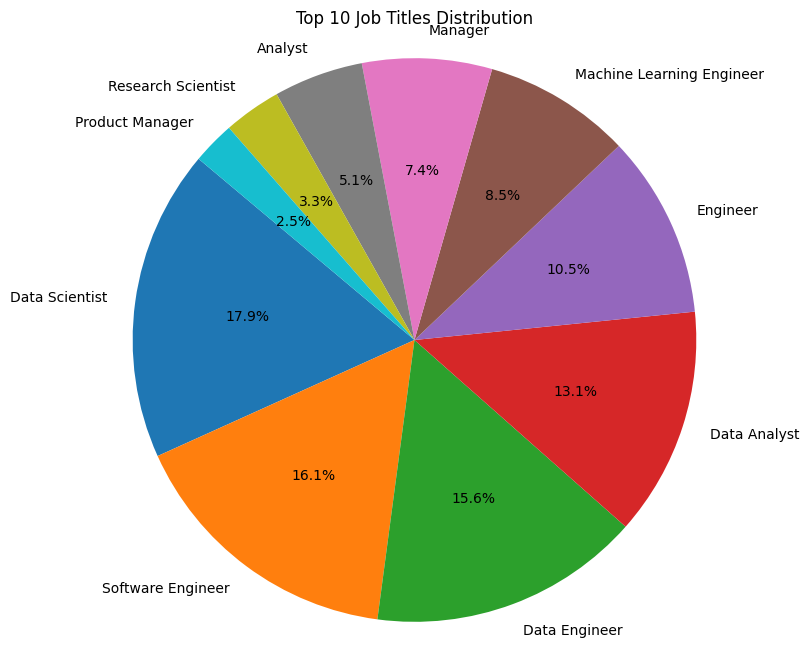

In [34]:
top_jobs = df['job_title'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(top_jobs, labels=top_jobs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Job Titles Distribution')
plt.axis('equal')
plt.show()

The pie chart above displays the distribution of the top 10 most common job titles in the dataset. Each slice represents a job title, and the size of the slice corresponds to the proportion of that job title among the top 10. This visualization helps to quickly identify which job roles are most prevalent in the data and how they compare to each other in terms of frequency.

* Box plot of salary distribution by work year with Matplotlib

<Figure size 1000x600 with 0 Axes>

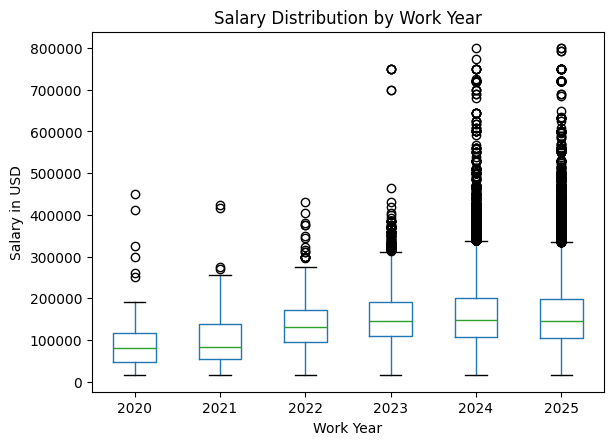

In [48]:
plt.figure(figsize=(10,6))
df.boxplot(column='salary_in_usd', by='work_year', grid=False)
plt.title('Salary Distribution by Work Year')
plt.suptitle('')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

The box plot above shows the distribution of salaries (in USD) for each work year. Each box represents the interquartile range (IQR) of salaries for a given year, with the line inside the box indicating the median salary. The whiskers extend to show the range of the data, excluding outliers, which are plotted as individual points. This visualization helps to compare salary distributions across years, identify trends, and spot any significant changes or outliers in the data.

* Line plot of average salary over time with Matplotlib


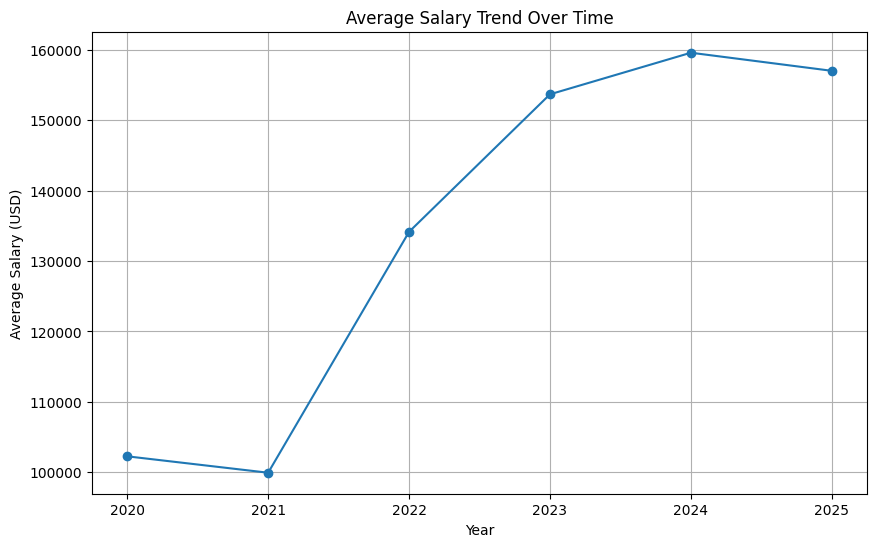

In [36]:
salary_trend = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(salary_trend['work_year'], salary_trend['salary_in_usd'], marker='o')
plt.title('Average Salary Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()

The line plot above illustrates the trend of average salaries (in USD) over the years. Each point on the line represents the mean salary for a specific year, and the line connects these points to show how salaries have changed over time. This visualization helps to identify overall trends, such as increases or decreases in average salaries, and can highlight periods of significant change or stability in the data.

* Distribution plot of salaries with Seaborn

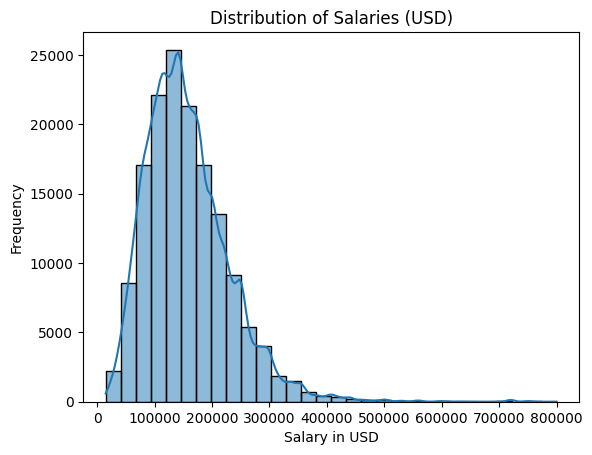

In [37]:
sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

The distribution plot above shows how salaries (in USD) are spread across the dataset. The histogram bars represent the frequency of salaries within specific ranges, while the smooth curve (KDE) estimates the probability density of the data. This visualization helps to identify the most common salary ranges, detect skewness, and spot any outliers or unusual patterns in the salary distribution.

* Smart plot with Seaborn

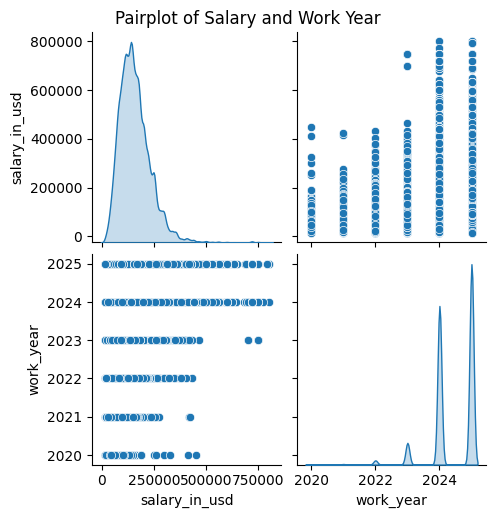

In [38]:
sns.pairplot(df[['salary_in_usd', 'work_year']], diag_kind='kde')
plt.suptitle('Pairplot of Salary and Work Year', y=1.02)
plt.show()

The pairplot above provides a comprehensive view of the relationships between the numerical variables 'salary_in_usd' and 'work_year'. The diagonal plots show the distribution of each variable, while the off-diagonal plots display scatterplots that reveal correlations between variables. This smart plot helps to quickly identify trends, patterns, and potential outliers, making it easier to understand how salary and work year are related in the dataset.

* KDE plot of salaries with Seaborn

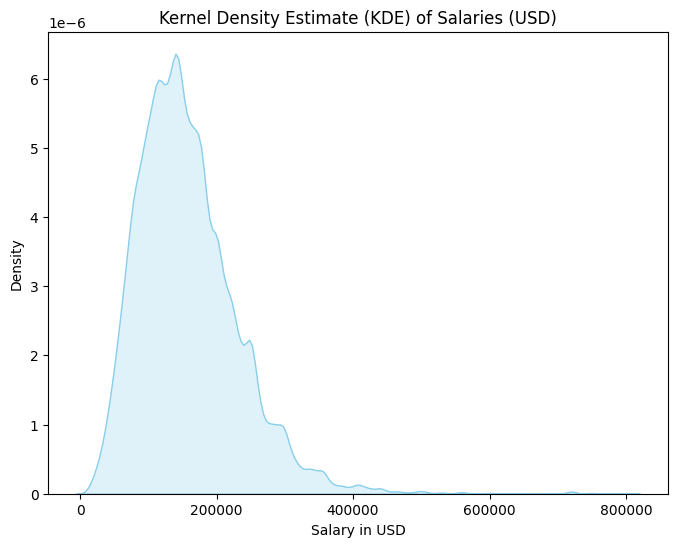

In [39]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['salary_in_usd'], fill=True, color='skyblue')
plt.title('Kernel Density Estimate (KDE) of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.show()

 The KDE plot above visualizes the distribution of salaries (in USD) across the dataset. The shaded area represents the estimated probability density function, showing where salaries are most concentrated. This plot helps to identify the overall shape of the salary distribution, including peaks, skewness, and potential outliers, providing insights into how salaries vary within the dataset.

* Area plot of average salary over time with Plotly

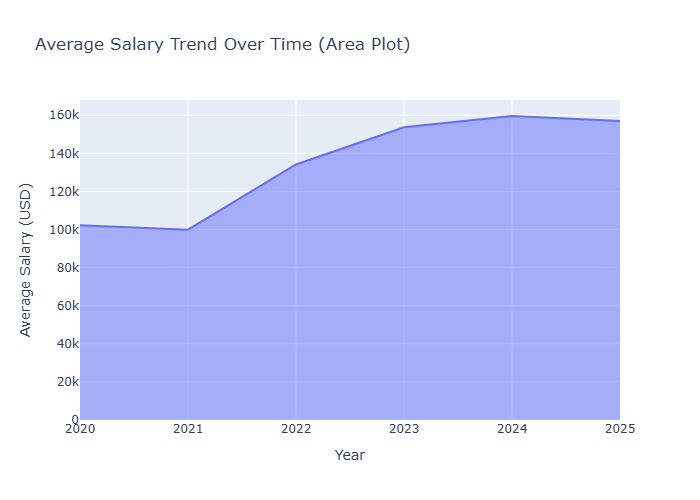

In [40]:
salary_trend = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
import plotly.express as px
fig = px.area(salary_trend, x='work_year', y='salary_in_usd',
               title='Average Salary Trend Over Time (Area Plot)',
               labels={'work_year': 'Year', 'salary_in_usd': 'Average Salary (USD)'})
fig.write_image('area_plot.png')
from IPython.display import Image, display
display(Image(filename='area_plot.png'))
fig.show()

The area plot above illustrates the trend of average salaries over the years. The x-axis represents the years of experience, while the y-axis shows the average salary in USD. The shaded area indicates the range of average salaries, providing a clear visual representation of how salaries have changed over time. This type of visualization is useful for identifying trends, patterns, and potential outliers in the data.

* Treemap of job titles by experience level with Plotly

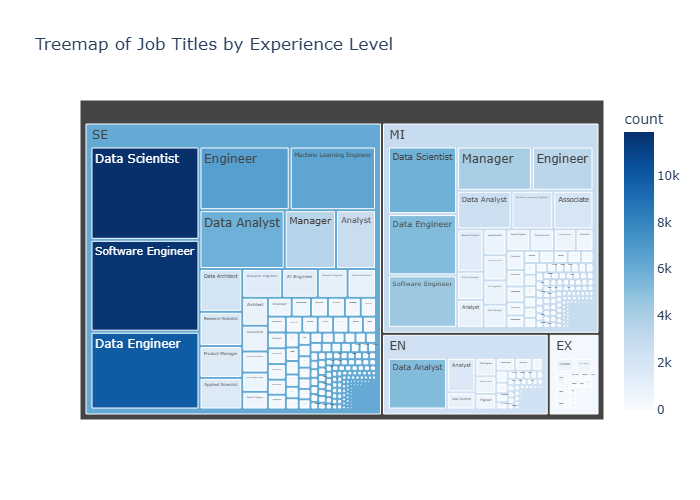

In [41]:
treemap_data = df.groupby(['experience_level', 'job_title']).size().reset_index(name='count')
fig = px.treemap(treemap_data, path=['experience_level', 'job_title'], values='count',
                  title='Treemap of Job Titles by Experience Level',
                  color='count', color_continuous_scale='Blues')
fig.write_image('treemap_plot.png')
from IPython.display import Image, display
display(Image(filename='treemap_plot.png'))
fig.show()

The treemap above visualizes the distribution of job titles across different experience levels in the dataset. Each rectangle represents a job title, grouped under its corresponding experience level. The size of each rectangle is proportional to the number of occurrences of that job title within the experience level. This visualization helps to quickly identify which job roles are most common for each experience level and compare the relative prevalence of different roles within and across experience categories.

* Sunburst chart of job titles by experience level and job title with Plotly

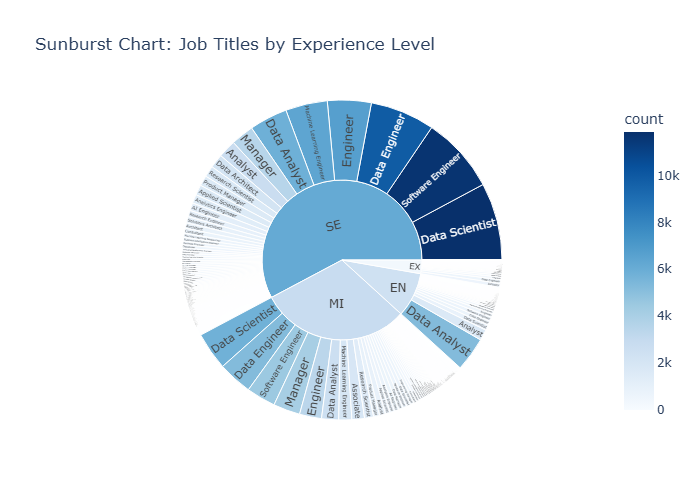

In [42]:
sunburst_data = df.groupby(['experience_level', 'job_title']).size().reset_index(name='count')
fig = px.sunburst(sunburst_data, path=['experience_level', 'job_title'], values='count',
                  title='Sunburst Chart: Job Titles by Experience Level',
                  color='count', color_continuous_scale='Blues')
fig.write_image('sunburst_plot.png')
from IPython.display import Image, display
display(Image(filename='sunburst_plot.png'))
fig.show()

The sunburst chart above visualizes the hierarchical relationship between experience level, employment type, and job title in the dataset. Each segment represents a category, with the center showing the highest level (experience level), followed by employment type, and then job title at the outermost ring. The size of each segment is proportional to the number of records in that category. This visualization helps to explore the distribution and composition of job roles within each experience and employment type, making it easy to identify dominant categories and compare their relative sizes.

* Scatter matrix of numerical features with Plotly

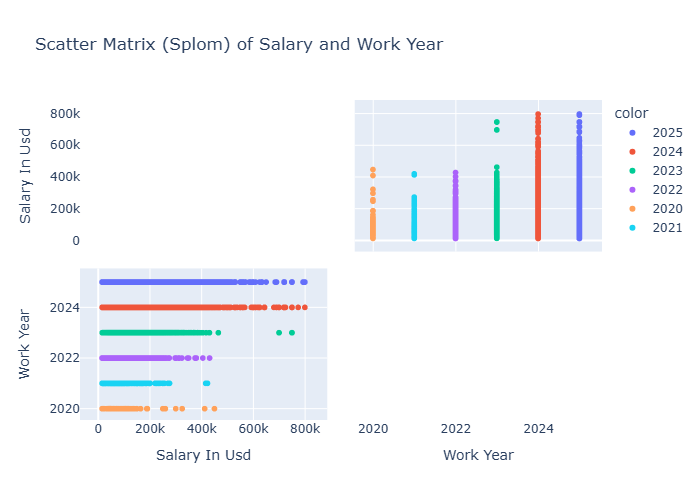

In [43]:
num_cols = ['salary_in_usd', 'work_year']
fig = px.scatter_matrix(df[num_cols],
                      dimensions=num_cols,
                      title='Scatter Matrix (Splom) of Salary and Work Year',
                      labels={col: col.replace('_', ' ').title() for col in num_cols},
                      color=df['work_year'].astype(str))
fig.update_traces(diagonal_visible=False)
fig.write_image('scatter_matrix.png')
from IPython.display import Image, display
display(Image(filename='scatter_matrix.png'))
fig.show()

The scatter matrix above visualizes pairwise relationships between the selected numerical features: salary (in USD) and work year. Each cell in the matrix shows a scatter plot comparing two variables, making it easy to spot correlations, trends, and outliers. The diagonal is hidden for clarity. Coloring by work year helps to distinguish data points from different years, providing additional insight into how these variables interact over time. This visualization is useful for quickly exploring the structure and relationships within the dataset.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---